In [4]:
import os
import pandas as pd
import string
from collections import Counter
import numpy as np
import re
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize

In [4]:
# def concatenate_files():
#     """
#     Concatenates files of data of 100 instances together into 1 dataframe and saves it to a tsv
#     """
#     cwd = os.path.abspath('') 
#     folders = os.listdir(path+'bijlagen') 

#     dfs = []
#     for folder in folders:
#         file = os.listdir(path+'/bijlagen/'+folder) 
#         df = pd.read_excel(path+'/bijlagen/'+folder+'/'+file[0], engine='openpyxl') 
#         num += len(df)
#         dfs.append(df)
#     df = pd.concat(dfs)
#     df.to_csv('data/data-2010-2020.tsv', sep='\t', index=False)

In [6]:
def base_clean_data(df):
    """
    Basic cleaning; drop duplicates and empty text rows
    """
    
    # Remove irrelevant and duplicate columns
    df_no_irr_cols = df.drop(['Publicatie.1', 'Publicatietype.1', 'Sectie', 'Lengte.1', 'Cite', 'Bedrijf', 'Agg-copyright', 'Pub-copyright', 'Titel.1', 'Weergeven', 'Ticker'], axis=1)

    # Remove rows without text 
    df_not_na = df_no_irr_cols[~df_no_irr_cols['Hlead'].isna()]
    print('# Removed empty: ', len(df)-len(df_not_na))
    
    # Remove duplicates
    df_no_dups = df_not_na.drop_duplicates()
    
    print('# Removed duplicates after removal empty: ', len(df_not_na)-len(df_no_dups))
    return df_no_dups

In [7]:
def extract_year(df):
    """
    Extract years of dates
    """
    # Remove punctuation
    df['Jaar'] = df['Datum'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

    # Retrieve years from various date formats
    df['Jaar'] = df['Jaar'].apply(lambda x: x.rsplit(' ', 1)[0] if len(x.split()) >= 4 else x)
    df['Jaar'] = df['Jaar'].apply(lambda x: x.split()[2] if len(x.split()) > 2 else x.split()[1])
    
    return df

In [8]:
def general_stats(df, path):
    """
    Print general stats
    
    """
    
    # Empty percentages
    print(df.isna().mean().round(4) * 100)
    
    # get top 10 authors, publications and year
    top_auteurs = df['Auteur'].value_counts().head(10)
    top_publicaties = df['Publicatie'].value_counts().head(10)
    jaar = Counter(df['Jaar'])
    top_jaar = pd.Series(dict(sorted(jaar.items())), name='Jaar')

    print(top_auteurs)     
    print(top_publicaties)  
    print(top_jaar)
    
    # plot figures of count of articles per top author, publications and year
    plt.figure()
    ta = top_auteurs.plot(kind='bar')
    ta.axhline(np.array(top_auteurs.values).mean(), color='r', linestyle='--', lw=1, label='mean count')
    plt.xlabel('authors')
    plt.ylabel('number of articles')
    plt.legend(loc='upper right')
    plt.savefig(path + 'top-auteurs', bbox_inches = 'tight')
    
    plt.figure()
    tp = top_publicaties.plot(kind='bar')
    tp.axhline(np.array(top_publicaties.values).mean(), color='r', linestyle='--', lw=1, label='mean count')
    plt.xlabel('publications')
    plt.ylabel('number of articles')
    plt.legend(loc='upper right')
    plt.savefig(path + 'top-publicaties', bbox_inches = 'tight')
    
    plt.figure()
    tj = top_jaar.plot(kind='bar')
    tj.axhline(np.array(top_jaar.values).mean(), color='r', linestyle='--', lw=1, label='mean count')
    plt.xlabel('years')
    plt.ylabel('number of articles')
    plt.legend(loc='upper right')
    plt.savefig(path + 'top-jaar', bbox_inches = 'tight')

In [14]:
def text_length_stats(df_col, path):    
    """
    Plot figures comparing summaries to regular text
    
    """
    # Get lists of token lengths of summaries and regular texts
    sv = []
    reg = []
    
    length_col = []
    for i in df_col:
        length = len(word_tokenize(i))
        length_col.append(length)
        if (('SAMENVATTING' in i) or ('ABSTRACT' in i)):
            sv.append(length)
        else:
            reg.append(length)
            
    # add to dataframe       
    df_col['Lengte'] = length_col 
    
    # get average for text types
    sv_avg = sum(sv)/len(sv)
    reg_avg = sum(reg)/len(reg)
    
    # print numerical stats
    print("Number of samenvattingen: ", len(sv))
    print("Number of regular texts: ", len(reg))
    print("Avg token count samenvattingen: ", sv_avg)
    print("Avg token count regular texts: ",reg_avg)
    
    # plot stats
    plt.figure()
    plt.hist(reg, bins=50, alpha=0.3, label='regular texts')
    plt.hist(sv, bins=50, alpha=1, label='samenvatting')
    plt.axvline(np.array(reg).mean(), color='r', linestyle='dashed', linewidth=1, label='mean regular texts')
    plt.axvline(np.array(sv).mean(), color='k', linestyle='dashed', linewidth=1, label='mean samenvatting')
    
    plt.xlabel("token count")
    plt.ylabel("number of articles")
    plt.legend(loc='upper right')

    plt.savefig(path + 'wc-sv-rt-ratio.png', bbox_inches = 'tight')
    print('Figure saved in ' + path + 'wc-sv-rt-ratio.png')

In [10]:
def remove_samenvattingen(base_df):
    """
    Remove summaries from basic cleaned dataframe
    """
    base_df_regular = base_df[base_df['Tekstsoort'] == 'regular']
    return base_df_regular.drop(['Tekstsoort'], axis=1)

Length original data:  12652

Data cleaning:
# Removed empty:  2
# Removed duplicates after removal empty:  731
Titel                     0.00
Datum                     0.00
Plaats van publicatie     0.00
Publicatie                0.00
Publicatietype            0.00
Lengte                    0.00
Landen                    0.00
Auteur                   41.93
Hlead                     0.00
Termen                    0.00
Jaar                      0.00
dtype: float64
HDC Media                      75
door onze verslaggever         72
DOOR JAN HENSELS               63
Bart Boele                     50
EDWIN VAN DER AA               47
PEET VOGELS                    44
PETER DEURLOO                  43
GEP LEEFLANG                   41
TANJA KITS                     39
Van een onzer verslaggevers    37
Name: Auteur, dtype: int64
De Stentor                       1540
De Gelderlander                   897
Noordhollands Dagblad             798
Dagblad De Limburger              755
De Twentsche 

/tmp/ipykernel_24427/3629558058.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col['Lengte'] = length_col


Number of samenvattingen:  809
Number of regular texts:  11110
Avg token count samenvattingen:  35.818294190358465
Avg token count regular texts:  407.09018901890187
Figure saved in plots/base_clean/wc-sv-rt-ratio.png


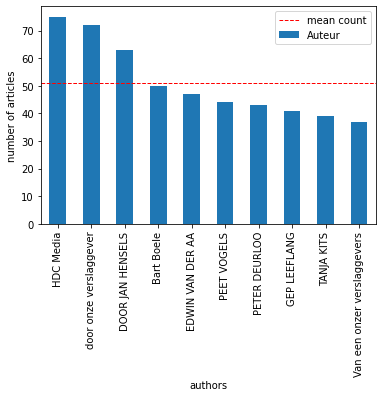

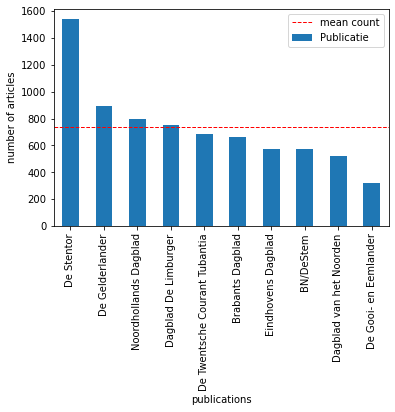

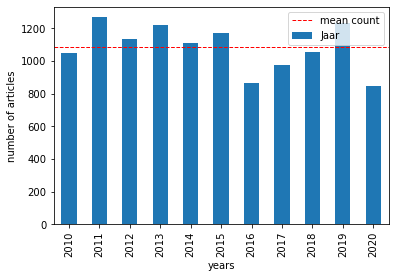

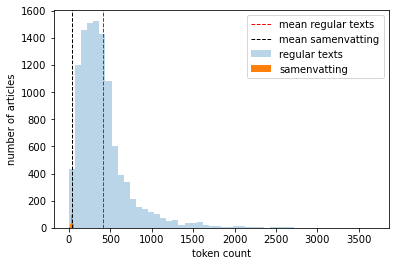

In [15]:
# concatenate_files()
df = pd.read_csv('data/data-2010-2020.tsv', sep='\t')

print('Length original data: ', len(df))
print('')

os.makedirs('plots', exist_ok=True)

# Data cleaning
print('Data cleaning:')
os.makedirs('plots/base_clean', exist_ok=True)

bc_path = 'plots/base_clean/'
base_df = base_clean_data(df)
base_df = extract_year(base_df)    

# Statistics base clean
general_stats(base_df, bc_path)
text_length_stats(base_df['Hlead'], bc_path)

In [1521]:
# Remove summaries
base_df['Tekstsoort'] = base_df.Hlead.apply(lambda x: 'samenvatting' if ('SAMENVATTING' in x or 'ABSTRACT' in x) else 'regular')
regular_base_df = remove_samenvattingen(base_df)
regular_base_df = regular_base_df[regular_base_df['Lengte'] > 10]
print("Stats after removing samenvattingen/abstract and short texts:")
print(regular_base_df.isna().mean().round(4) * 100)

Stats after removing samenvattingen/abstract and short texts:
Titel                     0.00
Datum                     0.00
Plaats van publicatie     0.00
Publicatie                0.00
Publicatietype            0.00
Lengte                    0.00
Landen                    0.00
Auteur                   40.86
Hlead                     0.00
Termen                    0.00
Jaar                      0.00
dtype: float64


In [1522]:
def clean_author(og_text):
    """
    Clean authors in author column
    """
    
    # lowercase
    text = og_text.lower()
    
    # remove 'door' e.g. door Meneer ILT -> Meneer ILT
    text = re.sub('door[^A-Za-z]', '', text)
    
    # If first letter is not ; -> split text on ; to get first part else get second part
    # Hi; -> Hi
    # ;Hi -> Hi
    if text[0] != ';':
        text = text.split(";", 1)[0]
    else:
        text = ' '.join(text.split(";", 1)[1:])
        
    # add 'versalggever' when author only consists of 'een'
    if text == 'een':
        text = 'een verslaggever'
        
    # remove additional metadata
    text = text.split("/", 1)[0]
    text = text.split("e-mail", 1)[0]
    text = re.sub("[()]", '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub('|', '', text)
    text = ' '.join([x for x in text.split() if "@" not in x])
    text = re.sub('tekst en foto\S+', '', text)
    
    # get name of person who wrote the text
    if 'tekst' in text:
        text = re.sub('tekst', '', text)
        text = re.sub(r'foto.*', '', text)  
    text = re.sub('foto\'s|foto’s', '', text)
    text = re.sub(':|·', '', text)
    text = " ".join(text.split())
    text = re.sub('[.|]$', '', text)
    
    # remove trailing whitespace
    text = " ".join(text.split())
    
    # make first letter capital
    text = text.title()
    return text

def get_unique_authors(df):
    """
    Get list of unique authors from the author column
    """
    authors = []
    for i in set(df['Auteur'].values):
        if isinstance(i, str): 
            
            # clean author names of author column to only get name
            i = clean_author(i)
            if len(i) > 0:
                authors.append(i)
    return list(set(authors))

def find_author(text, author, regex):
    """
    Fill in empty author value in author column by searching for the name in the text
    """
    # if author col is empty
    if pd.isnull(author):
        if re.match(regex, text, flags=re.IGNORECASE) is not None:
            new_author = re.search(regex, text, flags=re.IGNORECASE).group(0)
            author = clean_author(new_author)
    else:
        author = clean_author(author)
    return author
    

In [1523]:
def remove_place(text, cities_extra_reg):
    check = re.match(cities_extra_reg, ' '.join(text.split()[:4]), re.IGNORECASE)

    # match found
    if check is not None:
        
        # remove instance once that was match
        removed_rest = re.sub(extra_reg, '', ' '.join(text.split()[:4]), count=1,flags=re.IGNORECASE)

        # if the rest of sentence without removed is not empty
        if len(removed_rest) != 0:
            
            # if first letter of remaining sentence is uppercase (start of sentence)
            if removed_rest[0].isupper():
                text = removed_rest + ' ' + ' '.join(text.split()[4:])
                
            # if not (hence: not start of sentence)
            else:
                only_letters_removed_rest = re.sub(r'[^a-zA-Z0-9 ]', '', removed_rest)
                only_letters_removed_rest = " ".join(only_letters_removed_rest.split()) # remove trailing white space
                
                if len(only_letters_removed_rest) != 0:
                    
                    # check if uppercase after removal of spaces and dashes
                    if only_letters_removed_rest[0].isupper():
                        text = only_letters_removed_rest + ' ' + ' '.join(text.split()[4:])

                    # if still not, then it is removed 'location' is substring and you keep the text

        else:
            text = ' '.join(text.split()[4:])
    return text

In [1524]:
def clean_start(text, regex):
    start = ' '.join(text.split()[:10])
    remain_start = re.sub(regex, '', start)
    text = remain_start + ' '.join(text.split()[10:])
    return text 

In [1525]:
def remove_extra_words(regular_df, authors):
    vervolg = "(vervolg van vervolg van pagina\s\d{1,2})|(vervolg van pagina\s\d{1,2})|(vervolg vanpagina\s\d{1,2})|(vervolg van pagina\s\d{1,2}-)|(vervolg van voorpagina)|(vervolg van pagina)"
    extra_pagina = '(Bekijk de oorspronkelijke pagina: pagina [0-9]+|Zie verder pagina [0-9]+|Zie ook pagina [0-9]+|Lees verder op pagina [0-9]+|Lees ook pagina [0-9]+|pagina [0-9]+)'
    email = '(email: )(\S*@\S*\s?)'
    city_list = pd.read_csv('data/Woonplaatsen_in_Nederland_2020_20122021_042012.csv', sep=';')['Woonplaatsen'].tolist()

    # Regex for authors
    authors_set = set(authors) - (set(city_list) & set(authors))
    authors_reg = "(" + '|'.join(list(authors_set)) + ")"
    door_authors_reg = "(door |[^a-z]|)" + authors_reg 
    door_authors_extra_reg = '(-|- | -|)'+ "(" + door_authors_reg + ")([^a-z]|)"
    
    cities_reg = '|'.join(sorted(city_list, key=len, reverse=True)) # reverse so longer first removed to prevent substrings # OLD:removed Ee and EEN which are places
    cities_reg_slash = "(" + cities_reg + ")" + "/" + "(" + cities_reg + ")"
    cities_extra_reg = "(" + cities_reg_slash + ")" +  '|' +  "(" + cities_reg + ")" 
    cities_extra_reg = cities_extra_reg.upper()
    cities_extra_reg = '(-|- | -| - |)' + "(" + cities_extra_reg + ")"
    
    title_regex = '(.*(?= - ) - )|(.*(?= \| ) \| )|(<B>.*<\/B>)'
    
    uppercase_regex = '^([A-Z]+\s|[A-Z]+(?=[A-Z][a-z]))+'
    
    # Remove leading and trailing whitespaces
    regular_df['preprocessed_hlead'] = regular_df.Hlead.apply(lambda x: " ".join(x.split()))
    
    # Remove links
    regular_df['preprocessed_hlead'] = regular_df.preprocessed_hlead.apply(lambda x: re.sub(r'http\S+|www\S+', '', x, flags=re.IGNORECASE))
 
    # Remove emails
    regular_df['preprocessed_hlead'] = regular_df.preprocessed_hlead.apply(lambda x: re.sub(email, '', x, flags=re.IGNORECASE)) 
    
     # Remove 'vervolg van pagina x'
    regular_df['preprocessed_hlead'] = regular_df.preprocessed_hlead.apply(lambda x: re.sub(vervolg, '', x, flags=re.IGNORECASE))
    
    print("Vervolgpagina's removed")
    
     # Remove 'vervolg van pagina x'
    regular_df['preprocessed_hlead'] = regular_df.preprocessed_hlead.apply(lambda x: re.sub(extra_pagina, '', x, flags=re.IGNORECASE))
    
    print("Lees verder pagina's removed")
    
    # Find new author
    regular_df['Nieuwe auteur'] = regular_df.apply(lambda x: find_author(x.preprocessed_hlead, x.Auteur, door_authors_extra_reg), axis=1)   
    
    print("New authors found")
    
    # Remove 'Authors/door Author/door Author-'
    regular_df['preprocessed_hlead'] = regular_df.preprocessed_hlead.apply(lambda x: re.sub(door_authors_extra_reg, '', x, count=1, flags=re.IGNORECASE))  

    # Remove leading and trailing whitespaces
    regular_df['preprocessed_hlead'] = regular_df.preprocessed_hlead.apply(lambda x: " ".join(x.split()))   
    
    print("Authors removed from text")
    

    # Remove place name 
    regular_df['preprocessed_hlead'] = regular_df.preprocessed_hlead.apply(lambda x: remove_place(x, cities_extra_reg))  

    # Remove leading and trailing whitespaces
    regular_df['preprocessed_hlead'] = regular_df.preprocessed_hlead.apply(lambda x: " ".join(x.split()))  

    print("Placenames removed")


    # Remove title splitted by -
    regular_df['preprocessed_hlead'] = regular_df.preprocessed_hlead.apply(lambda x: clean_start(x, title_regex))  

    # Remove leading and trailing whitespaces
    regular_df['preprocessed_hlead'] = regular_df.preprocessed_hlead.apply(lambda x: " ".join(x.split()))  
    
    print('Titles removed')
    
    # Remove title splitted by -
    regular_df['preprocessed_hlead'] = regular_df.preprocessed_hlead.apply(lambda x: clean_start(x, uppercase_regex))  

    # Remove leading and trailing whitespaces
    regular_df['preprocessed_hlead'] = regular_df.preprocessed_hlead.apply(lambda x: " ".join(x.split()))  
    
    print('Uppercases removed')
    
    # Remove trailing - 
    regular_df['preprocessed_hlead'] = regular_df.preprocessed_hlead.apply(lambda x: x[1:] if x[0]=='-' else x)  

    # Remove leading and trailing whitespaces
    regular_df['preprocessed_hlead'] = regular_df.preprocessed_hlead.apply(lambda x: " ".join(x.split()))  

    print("Trailing - removed.")

    
    return regular_df

In [1526]:
# main; create clean datafile
authors = get_unique_authors(regular_base_df)
regular_df_cleaned = remove_extra_words(regular_base_df, authors)
regular_df_cleaned.to_csv('data/complete-clean-preprocessed-data-2010-2020-1.tsv', sep='\t', index=False)
regular_df_cleaned = pd.read_csv('data/complete-clean-preprocessed-data-2010-2020-1.tsv', sep='\t')
print(regular_df_cleaned.isna().mean().round(4) * 100)

print(regular_df_cleaned['Auteur'].value_counts())
print(regular_df_cleaned['Nieuwe auteur'].value_counts())

Vervolgpagina's removed
Lees verder pagina's removed
New authors found
Authors removed from text
Placenames removed
Titles removed
Uppercases removed
Trailing - removed.
Titel                     0.00
Datum                     0.00
Plaats van publicatie     0.00
Publicatie                0.00
Publicatietype            0.00
Lengte                    0.00
Landen                    0.00
Auteur                   40.86
Hlead                     0.00
Termen                    0.00
Jaar                      0.00
preprocessed_hlead        0.00
Nieuwe auteur            39.11
dtype: float64
HDC Media                             75
door onze verslaggever                72
DOOR JAN HENSELS                      63
Bart Boele                            50
EDWIN VAN DER AA                      47
                                      ..
Ellen van Gaalen                       1
YVONNE VAN SEBILLE                     1
rick taekema r.taekema@hdcmedia.nl     1
Tekst en foto's Johan Nebbeling        1
VA

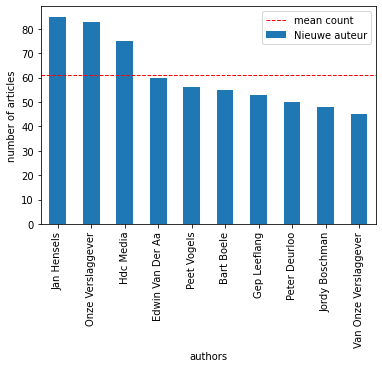

In [1527]:
# code to view the authors that are found in comparison to previous author stats

plt.figure()
top_new_auteurs = regular_df_cleaned['Nieuwe auteur'].value_counts().head(10)
ta = top_new_auteurs.plot(kind='bar')
ta.axhline(np.array(top_new_auteurs.values).mean(), color='r', linestyle='--', lw=1, label='mean count')
plt.xlabel('authors')
plt.ylabel('number of articles')
plt.legend(loc='upper right')
plt.savefig(bc_path + 'top-new-auteurs', bbox_inches = 'tight')
    

In [1529]:
# cleaned dataset
regular_df_cleaned

,Titel,Datum,Plaats van publicatie,Publicatie,Publicatietype,Lengte,Landen,Auteur,Hlead,Termen,Jaar,preprocessed_hlead,Nieuwe auteur
0,Een dodelijke missie,2 januari 2010 zaterdag,International,Het Financieele Dagblad,News,1906,"Netherlands, Kingdom of the",NaN,In februari 1945 verging de Duitse onderzeeboo...,Krant|HFD|DUTCHNEDERLANDS|Marine Transportatio...,2010,In februari 1945 verging de Duitse onderzeeboo...,NaN
1,SANERINGSplan Nog onderzoek naar aanpak van gr...,4 januari 2010 maandag,International,Provinciale Zeeuwse Courant,News,359,"Netherlands, Kingdom of the",EUGÈNE VERSTRAETEN,door Eugène Verstraeten PHILIPPINE De voormal...,Krant|PZ|DUTCHNEDERLANDS|Environmental Cleanup...,2010,De voormalige stortplaats in de Kanaalpolder b...,Eugène Verstraeten
2,Willem Verhees prins der Peelpluimen,4 januari 2010 maandag,International,Eindhovens Dagblad,News,104,"Netherlands, Kingdom of the",NaN,Tijdens het prinsenbal van de Peelpluimen in d...,Krant|ED|DUTCHNEDERLANDS|Heads Of State + Gove...,2010,Tijdens het prinsenbal van de Peelpluimen in d...,NaN
3,Nieuwbouwplan wasserij trekt 13 bezwaren,5 januari 2010 dinsdag,International,De Gelderlander,News,96,"Netherlands, Kingdom of the",NaN,WAGENINGEN - Het plan voor de bouw van twaal...,Krant|DG|DUTCHNEDERLANDS|Property + Housing Re...,2010,Het plan voor de bouw van twaalf woningen op h...,NaN
4,R'dam boort hoop op schaatspret de grond in,5 januari 2010 dinsdag,International,Spits,News,248,"Netherlands, Kingdom of the",";Navis,Jan-Willem","AMSTERDAM De weersvoorspellingen waren goed, ...",Krant|Spits|DUTCHNEDERLANDS|Ice Skating,2010,"De weersvoorspellingen waren goed, het zag er ...","Navis,Jan-Willem"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11037,Voorbarige conclusie over slechte bodemkwalite...,28 juli 2018 zaterdag,International,Brabants Dagblad,News,548,"Netherlands, Kingdom of the",LUKAS VAN DER STORM,"Afval scheiden gaat heel aardig, de luchtkwali...",Krant|DUTCHNEDERLANDS|AgricultureFarmers + Ran...,2018,"Afval scheiden gaat heel aardig, de luchtkwali...",Lukas Van Der Storm
11038,Sanering duinen Petten minder succesvol,31 juli 2018 dinsdag,International,Noordhollands Dagblad,News,461,"Netherlands, Kingdom of the",Michiel Snik,Petten De sanering van de vervuiling van de...,"Krant|noordhollandsdagblad,HDC_Noordholland,HD...",2018,De sanering van de vervuiling van de bodem met...,Michiel Snik
11039,Sanering ’Petten’ blijkt stuk minder succesvol,31 juli 2018 dinsdag,International,Noordhollands Dagblad,News,457,"Netherlands, Kingdom of the",Michiel Snik,Petten De sanering van de vervuiling van de...,"Krant|noordhollandsdagblad,HDC_Noordholland,HD...",2018,De sanering van de vervuiling van de bodem met...,Michiel Snik
11040,Ondernemen met het boerenverstand Nieuw bedrij...,31 juli 2018 dinsdag,International,Huis-aan-huiskranten de Persgroep,News,288,"Netherlands, Kingdom of the",NaN,Twee broers uit Rijssen-Holten nemen samen het...,Krant|deWeekkrant|DUTCHNEDERLANDS|Entrepreneur...,2018,Twee broers uit Rijssen-Holten nemen samen het...,NaN
